In [ ]:
import numpy as np
import pandas as pd

## PRACTICE ASSIGNMENT

Q1. Use MNIST dataset. Store all the samples in X and labels in y.
 
  Use: np.random.seed(42)

  Split the dataset in the following ratio.

 Training : Take the first 70% of samples from X and store them in x_train

 Testing: Take the remaining 30% of samples from X and store them in x_test

  Store the respective labels in y_train,y_test respectively.

  The last training sample is of digit __?

In [ ]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version = 1, return_X_y = True)

In [ ]:
np.random.seed = 42

In [ ]:
X.iloc[0]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)
y_train[y_train.shape[0] - 1]

'6'

Build a classifier that differentiates digit 6 from digit 9.

Steps to be followed
Collect all digit-6 (Positive class) and digit-9 (Negative class) images from 

x_train
 and stack them properly as a single datamatrix 

x_train_69

Keep all digit-6 images from index 0 to i followed by digit-9 images from index i+1 to n (i denotes the end index of digit-6 images)
Similarly, collect the respective labels and store it in a variable 

y_train_69
Set the label values to 1 for positive classes and 0 for negative classes.
Load 

from sklearn.utils import shuffle
Shuffle the datamatrix and labels. (Set 

random_state
 value to 1729).
Create 

x_test_69
 and 

y_test_69
 by repeating the steps from 1 to 6 with required modifications.

Q2. What is the sum of all the labels in the vector y_train_69?

In [ ]:
data_xy = pd.concat([y_train, X_train], axis = 1)
positive = data_xy[data_xy['class'] == '6'].iloc[:, 1:]
negative = data_xy[data_xy['class'] == '9'].iloc[:, 1:]
x_train_69 = pd.concat([positive, negative])
y_train_69 = np.append(np.ones(positive.shape[0],),(np.zeros(negative.shape[0],)))

In [ ]:
from sklearn.utils import shuffle
shuffle_data = shuffle(x_train_69, y_train_69, random_state = 1729)

In [ ]:
data_test_xy = pd.concat([y_test, X_test], axis = 1)
positive = data_test_xy[data_test_xy['class'] == '6'].iloc[:, 1:]
negative = data_test_xy[data_test_xy['class'] == '9'].iloc[:, 1:]
x_test_69 = pd.concat([positive, negative])
y_test_69 = np.append(np.ones(positive.shape[0],),(np.zeros(negative.shape[0],)))

In [ ]:
shuffle_test_data = shuffle(x_test_69, y_test_69, random_state = 1729)

In [ ]:
np.sum(y_train_69)

4855.0

Q3. What is the sum of all the labels in the vector y_test_69.

In [ ]:
np.sum(y_test_69)

2021.0

Q4. Apply StandardScaler to all the training samples in x_train_69 and store the result in another variable (say, x_train_69Tf).

* What is the mean of the zeroth sample?
* What is the mean of zeroth feature?
* What is the standard deviation of the zeroth sample?
* What is the standard deviation of the zeroth feature?

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_69Tf = scaler.fit_transform(shuffle_data[0])

In [ ]:
x_train_69Tf[0,:].mean(), x_train_69Tf[:,0].mean(), x_train_69Tf[0,:].std(), x_train_69Tf[:,0].std()

(0.08128379559427992, 0.0, 0.735882322603775, 0.0)

Q5. Train the LogisticRegression model using SGDClassifier() with the following common settings.

* No Regularization
* random_state : 10
* Iteration : 10

Capture the loss for each iteration and plot the iteration vs loss curve. For which of the following settings, the iteration vs loss curve decreased monotonically?

A. Set Learning rate : 0.01 and plot the curve and fit the model with `x_train_69 `

B. Set learning rate to 0.000001 and fit the model with `x_train_69 ` .

C. Keep the learning rate as 0.01. Scale the samples using `StandardScaler()` and fit the model with the pre-processed samples.

D. Use the **invscaling** stratagey for the learning rate with power_t = 1. Fit the model with `x_train_69` (without pre-procesing).

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

loss1 = []
sgd = SGDClassifier(loss = 'log', max_iter = 1, random_state=10, eta0 = 0.01, warm_start = True, alpha = 0, learning_rate='constant', penalty = 'l2')
for i in range(10) :
  sgd.fit(x_train_69, y_train_69)
  y_pred = sgd.predict(x_train_69)
  loss1.append(log_loss(y_train_69, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

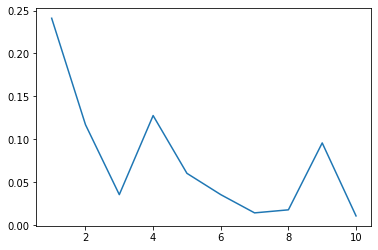

In [ ]:
import matplotlib.pyplot as plt
iter = [i for i in range(1,11)]

plt.plot(iter, loss1)
plt.show()

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

loss2 = []
sgd = SGDClassifier(loss = 'log', random_state=10, eta0 = 0.000001, max_iter = 1, warm_start = True, alpha = 0, learning_rate='constant', penalty = 'l2')
for i in range(10) :
  sgd.fit(x_train_69, y_train_69)
  y_pred = sgd.predict(x_train_69)
  loss2.append(log_loss(y_train_69, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

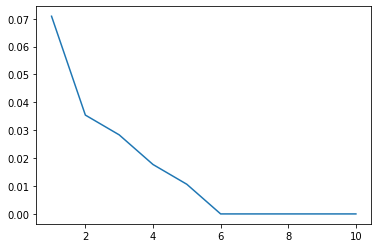

In [ ]:
import matplotlib.pyplot as plt
iter = [i for i in range(1,11)]

plt.plot(iter, loss2)
plt.show()

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
from sklearn.pipeline import make_pipeline

loss3 = []
sgd = SGDClassifier(loss = 'log', random_state=10, eta0 = 0.01, max_iter = 1, warm_start = True, alpha = 0, learning_rate='constant', penalty = 'l2')
estimator = make_pipeline(StandardScaler(), sgd)
for i in range(10) :
  estimator.fit(x_train_69, y_train_69)
  y_pred = estimator.predict(x_train_69)
  loss3.append(log_loss(y_train_69, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

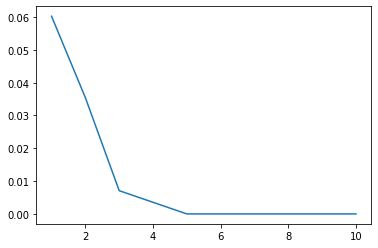

In [ ]:
import matplotlib.pyplot as plt
iter = [i for i in range(1,11)]

plt.plot(iter, loss3)
plt.show()

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

loss4 = []
sgd = SGDClassifier(loss = 'log', max_iter = 1, random_state=10, eta0 = 0.01, warm_start = True, alpha = 0, learning_rate='invscaling', penalty = 'l2', power_t = 1)
for i in range(10) :
  sgd.fit(x_train_69, y_train_69)
  y_pred = sgd.predict(x_train_69)
  loss4.append(log_loss(y_train_69, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

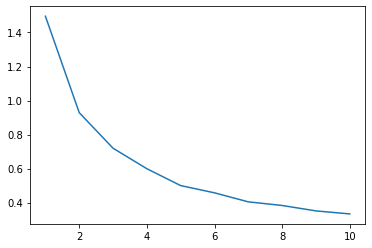

In [ ]:
import matplotlib.pyplot as plt
iter = [i for i in range(1,11)]

plt.plot(iter, loss4)
plt.show()

## GRADED ASSIGNMENT

Q1. Train the LogisticRegression model using SGDClassifier() with the following common settings.

* No Regularization
* random_state : 10
* Iteration : 30
    
Capture the loss for each iteration and plot the iteration vs loss curve. For which of the following settings, the iteration vs loss curve converged quickly to zero loss?

 A. Set Learning rate : 0.01 and plot the curve and fit the model with `x_train_69 `

 B. Set learning rate to 0.000001 and fit the model with `x_train_69 ` .
 
 C. Keep the learning rate as 0.01. Scale the samples using `StandardScaler()` and fit the model with the pre-processed samples.
 
 D. Use the **invscaling** stratagey for the learning rate with power_t = 1. Fit the model with x_train_69 (without pre-procesing).

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

loss1 = []
sgd = SGDClassifier(loss = 'log', max_iter = 1, random_state=10, eta0 = 0.01, warm_start = True, alpha = 0, learning_rate='constant', penalty = 'l2')
for i in range(30) :
  sgd.fit(x_train_69, y_train_69)
  y_pred = sgd.predict(x_train_69)
  loss1.append(log_loss(y_train_69, y_pred))

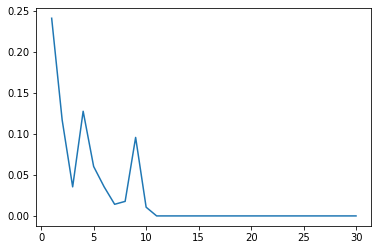

In [ ]:
import matplotlib.pyplot as plt
iter = [i for i in range(1,31)]

plt.plot(iter, loss1)
plt.show()

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

loss2 = []
sgd = SGDClassifier(loss = 'log', random_state=10, eta0 = 0.000001, max_iter = 1, warm_start = True, alpha = 0, learning_rate='constant', penalty = 'l2')
for i in range(30) :
  sgd.fit(x_train_69, y_train_69)
  y_pred = sgd.predict(x_train_69)
  loss2.append(log_loss(y_train_69, y_pred))

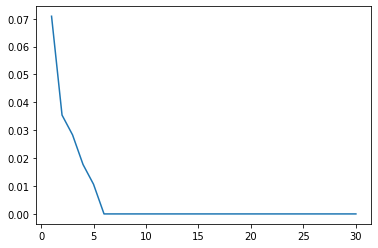

In [ ]:
import matplotlib.pyplot as plt
iter = [i for i in range(1,31)]

plt.plot(iter, loss2)
plt.show()

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
from sklearn.pipeline import make_pipeline

loss3 = []
sgd = SGDClassifier(loss = 'log', random_state=10, eta0 = 0.01, max_iter = 1, warm_start = True, alpha = 0, learning_rate='constant', penalty = 'l2')
estimator = make_pipeline(StandardScaler(), sgd)
for i in range(30) :
  estimator.fit(x_train_69, y_train_69)
  y_pred = estimator.predict(x_train_69)
  loss3.append(log_loss(y_train_69, y_pred))

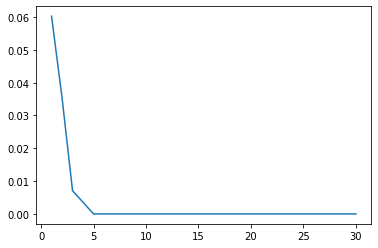

In [ ]:
import matplotlib.pyplot as plt
iter = [i for i in range(1,31)]

plt.plot(iter, loss3)
plt.show()

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

loss4 = []
sgd = SGDClassifier(loss = 'log', max_iter = 1, random_state=10, eta0 = 0.01, warm_start = True, alpha = 0, learning_rate='invscaling', penalty = 'l2', power_t = 1)
for i in range(30) :
  sgd.fit(x_train_69, y_train_69)
  y_pred = sgd.predict(x_train_69)
  loss4.append(log_loss(y_train_69, y_pred))

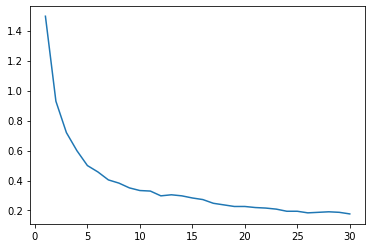

In [ ]:
import matplotlib.pyplot as plt
iter = [i for i in range(1,31)]

plt.plot(iter, loss4)
plt.show()

Q2. In the above question, enter the iteration number for which the loss becomes zero and remains zero for the rest of the iterations.


5

Q3. Create the classifier with the following settings

* No Regularization
* eta0 = 0.5
* learning_rate = 'inv_scaling'
* power_t = 0.5
* iterations = 10
* Shuffle = True
* random_state = 10

Train the classifier with `x_train_69`. 
   
Answer the following questions...

How many false positives (FP) are there in the predictions made on training samples?

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


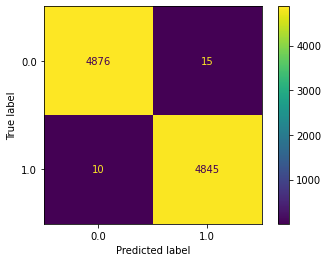

In [ ]:
sgd = SGDClassifier(eta0 = 0.5, learning_rate='invscaling', power_t = 0.5, max_iter = 10, shuffle=True, random_state = 10)

sgd.fit(x_train_69, y_train_69)
y_pred = sgd.predict(x_train_69)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_train_69, y_pred)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = sgd.classes_).plot()

Q4. Display all the False Positive samples.Could a human recognize them correctly?. Get the index of all FP samples in ascending order. Enter the first index.

In [ ]:
index_y = np.where(y_train_69 == 0.0)
index_y_pred = np.where(y_pred == 1.0)
np.intersect1d(index_y, index_y_pred)[0]

4864

Q5. Load `20newsgroups` data.
 
 Vectorize the data using TfidfVectorizer. What is the shape of X?

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

data = fetch_20newsgroups()
X, y = data.data, data.target
tfidf = TfidfVectorizer().fit_transform(X)
tfidf.shape

(11314, 130107)

Q6. Split the data into train and test using train_test_split with test_size = 0.3 and random_state = 0.

Use MultinomialNB to train the model.

Compute test score.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(tfidf, y, test_size = 30, random_state = 0)
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.9